In [1]:
from qlearning.qlearning import QLearningPathPlanner
from map_generator import MapGenerator
import os
import numpy as np
from map_resize.map_resize import get_resized_map
import matplotlib.pyplot as plt

In [2]:
def get_core_points(path, min_point_seperation):
    curr_point = path[0]
    next_point = path[1]
    dr = (next_point[0] - curr_point[0])
    if dr == 0:
        prev_slope = np.inf
    else:
        prev_slope = (next_point[1] - curr_point[1]) / dr
    
    core_points = list()
    
    last_point = path[0]
    for i in range(1, path.shape[0]-1):
        curr_point = path[i]
        next_point = path[i+1]
        dr = (next_point[0] - curr_point[0])
        if dr == 0:
            curr_slope = np.inf
        else:
            curr_slope = (next_point[1] - curr_point[1]) / dr
        if curr_slope != prev_slope:
            if np.sqrt((last_point[0]-curr_point[0])**2 + (last_point[1] - curr_point[1])**2) >= min_point_seperation:
                core_points.append(curr_point)
                last_point = curr_point
        prev_slope = curr_slope
    
    if len(core_points) == 0:
        core_points.append(path[round(path.shape[0]/2)])
    
    return np.array(core_points)

In [3]:
map_details = {
    'map1': {
        'file_name': 'custom_map_2_params.yaml',
        'start': [100, 400],
        'end': [400, 100],
        'points': 2
    },
    'map2': {
        'file_name': 'custom_map_4_params.yaml',
        'start': [50, 250],
        'end': [250, 250],
        'points': 2
    },
    'map3': {
        'file_name': 'custom_map_3_params.yaml',
        'start': [50, 450],
        'end': [300, 100],
        'points': 4
    },
    'map4': {
        'file_name': 'custom_map_1_params.yaml',
        'start': [600, 800],
        'end': [1700, 500],
        'points': 4
    },
    'map5': {
        'file_name': 'map_012_params.yaml',
        'start': [250, 1750],
        'end': [1100, 200],
        'points': 5
    }
}

(2000, 2000)


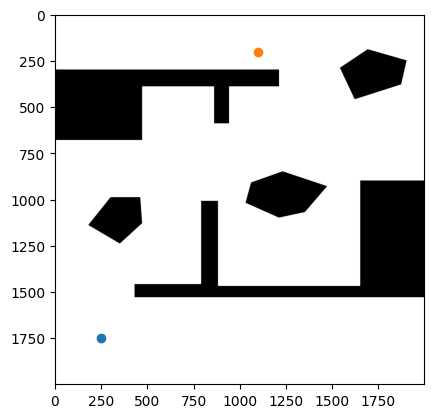

In [4]:
curr_details = map_details['map5']
map_gen = MapGenerator(os.path.join('map_params', curr_details['file_name']))
curr_map = map_gen.map.get_map()
start = np.array(curr_details['start']).astype(np.int32)
end = np.array(curr_details['end']).astype(np.int32)
plt.imshow(curr_map, cmap='gray')
plt.scatter([start[0]], [start[1]])
plt.scatter([end[0]], [end[1]])
print(curr_map.shape)
plt.show()

In [5]:
new_map, curr_loss, resize_factor = get_resized_map(curr_map, 0.05, 0.01)
new_start, new_end = np.round(start*resize_factor).astype(np.int32), np.round(end*resize_factor).astype(np.int32)
curr_loss, resize_factor, new_start, new_end

(0.0306175, 0.02, array([ 5, 35]), array([22,  4]))

(40, 40)


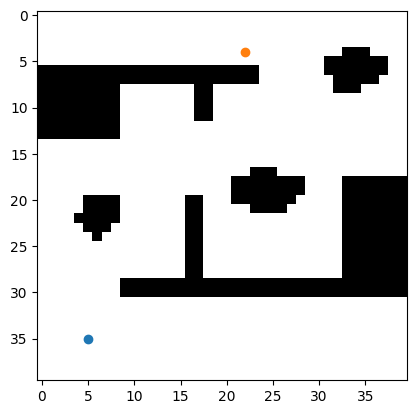

In [6]:
plt.imshow(new_map, cmap='gray')
plt.scatter([new_start[0]], [new_start[1]])
plt.scatter([new_end[0]], [new_end[1]])
print(new_map.shape)
plt.show()

In [7]:
q_planner = QLearningPathPlanner(
        new_map,
        new_start,
        new_end,
        episodes=500
    )
q_planner.train()

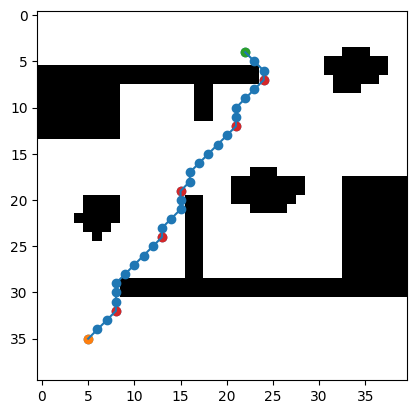

In [8]:
path = q_planner.get_path()
core_points = get_core_points(path, np.mean(new_map.shape)*0.1)
plt.imshow(new_map, cmap='gray')
plt.plot(path[:, 0], path[:, 1])
plt.scatter(path[:, 0], path[:, 1])
plt.scatter(new_start[0], new_start[1])
plt.scatter(new_end[0], new_end[1])
#plt.plot([new_start[0]]+list(core_points[:, 0])+[new_end[0]], [new_start[1]]+list(core_points[:, 1])+[new_end[1]])
plt.scatter(core_points[:, 0], core_points[:, 1])
plt.show()